## Exercise 7

In [1]:
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from scipy.stats import mode
from sklearn.model_selection import ShuffleSplit

np.random.seed(42)

In [2]:
Xm, ym = make_moons(n_samples=10000, noise=0.4, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size=0.2, random_state=42)

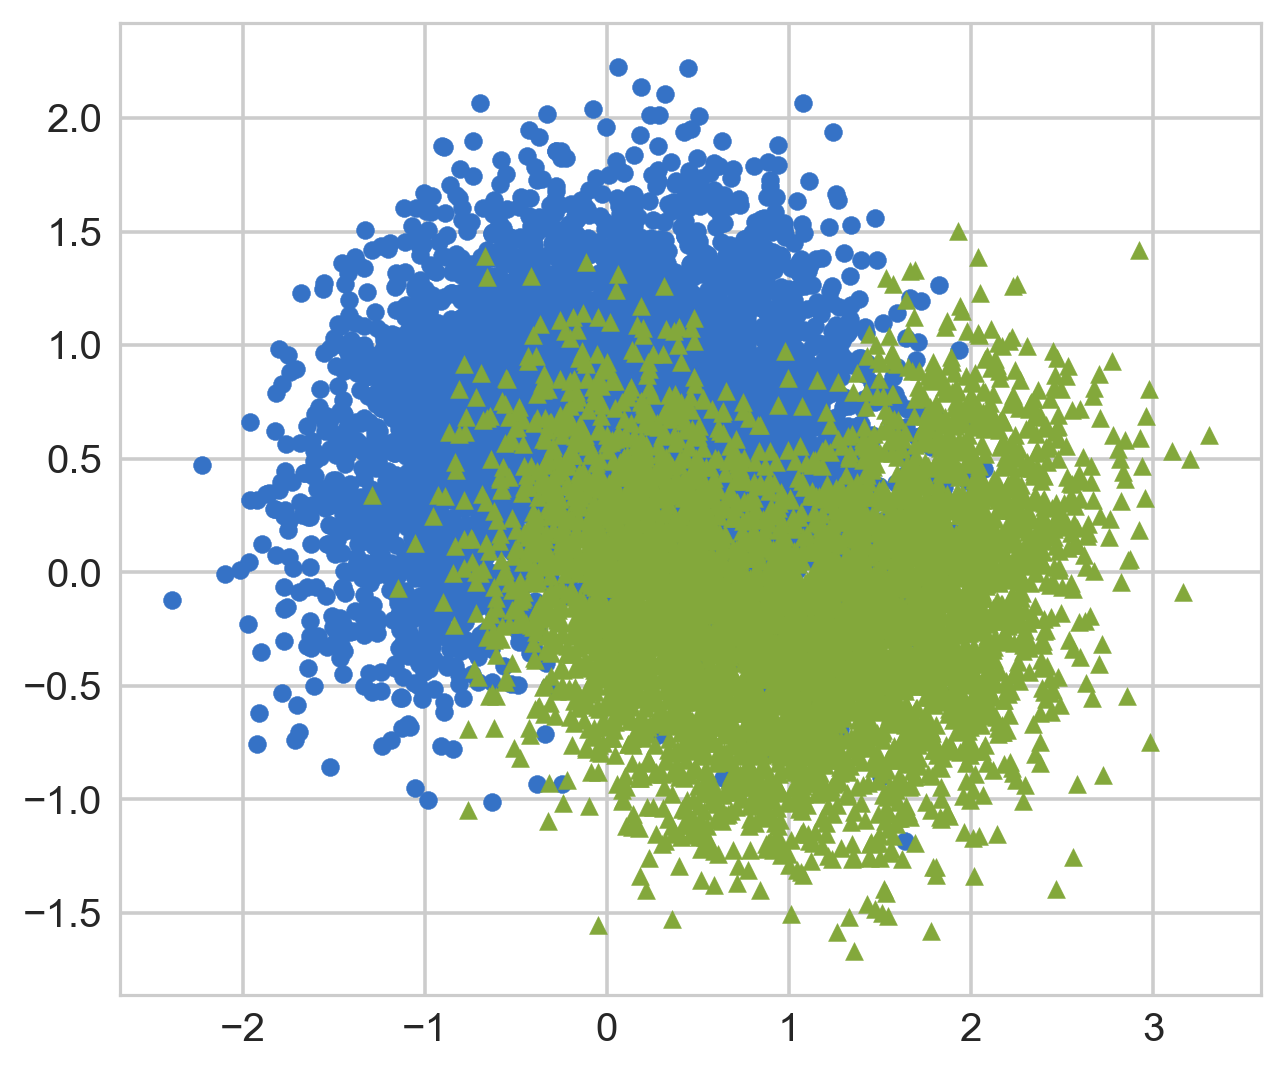

In [4]:
plt.scatter(Xm[:, 0][ym==0], Xm[:, 1][ym==0])
plt.scatter(Xm[:, 0][ym==1], Xm[:, 1][ym==1], marker='^', c='g')
plt.show()

In [5]:
tree_clf = DecisionTreeClassifier(random_state=42)

param_grid = [{
#     'max_depth': list(range(2,10)),
    'max_leaf_nodes': list(range(2, 30)),
    'min_samples_split': list(range(2, 10, 2)),
#     'min_samples_leaf': [80,20,10,5]
}]

grid_search = GridSearchCV(tree_clf, param_grid, cv=3, verbose=1)

In [6]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:    2.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29],
                          'min_samples_split': [2, 4, 6, 8]}],
             verbose=1)

In [7]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [8]:
grid_search.best_score_

0.8555001986342105

In [9]:
grid_search.score(X_test, y_test)
# accuracy_score(y_test, grid_search.predict(X_test))

0.8695

## Exercise 8

In [10]:
rs = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

In [11]:
X_sets=[]
y_sets=[]
for train_ix, _ in rs.split(X_train):
    X_sets.append(X_train[train_ix])
    y_sets.append(y_train[train_ix])

In [12]:
forest=[]
scores = []
for i in range(len(X_sets)):
    forest.append(grid_search.best_estimator_.fit(X_sets[i], y_sets[i]))
    scores.append(forest[i].score(X_test, y_test))
print(np.mean(scores))

0.8054499999999999


In [13]:
sc_arr=np.zeros((len(X_test), len(forest)))

for j in range(len(forest)):
    sc_arr[:,j]=forest[j].predict(X_test)

In [14]:
y_pred = mode(sc_arr, axis=1).mode

In [15]:
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'ACC = {accuracy_score(y_test, y_pred)}')

MAE = 0.1665
MSE = 0.1665
ACC = 0.8335
